### Group members (first and last names):
- ####  *Abdelhak Kermia*


# Introduction

This assignment will guide you through fundamental machine learning concepts, including:
- Splitting data into training, validation, and test sets
- Performing model selection using cross-validation
- Training and evaluating classification models (Decision Tree, KNN, Logistic Regression, and SVM)
- Using evaluation metrics such as precision, recall, and F1-score

We will use datasets from `seaborn` and evaluate models using different metrics.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **(0pts)**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are worth 0 points: partial points can be awarded at the teacher's discretion. Overcomplete answers do not award extra points.

Don't forget to **save your work frequently!** (`Ctrl + s`)

**You need at least 20 points (out of 30 available) to pass** (66%).

In [1]:
points=30

# 1. Theory Questions (Total: 10 points)

#### 1.1. **(2 pts) Why do we split data into training, validation, and test sets?**
- Explain the purpose of each dataset and how it helps prevent overfitting.

Train set : (training phase)
- The model learns patterns and relationships from the train set, overfitting can be reduced/prevented by applying regularization technique at this stage.

Validation set: (tuning phase)
- The trained model is tested on unseen data from the validation set.
- This is the tuning phase for the model and the hyperparameters // allow to select choose the best hyperparameters and models.
- Overfitting can be prevented by early stopping the training and/or modify the training hyperparameters or even the model by looking at accuracy of the train set vs the validation set and some other performance metrics (precision,recall,f1,...).
  - e.g If the validation accuracy stops improving while training accuracy still improve (uses of multiple validation/training iteration) -> overfitting,
  - e.g If there is a large discrepancy between accuracy of the training set and the validation step : either the hyperparameters and or the model are not well suited for the problem at hands.

Test set: (testing phase)
 - The test set  is used for the generalisation performance assessment of the model on untouched data from the initial dataset:
  - It helps reduce overfitting by checking without bias if the model is well-fitted / generalise correctly the trends/patterns in the dataset:
    - e.g. If the test accuracy is much lower than the validation accuracy it means there is probably overfitting.

#### 1.2. **(2 pts) What is cross-validation, and why is it important?**
   - Describe how k-fold cross-validation works



In ML , Cross-validation is a technique to evaluate the performance and generalisability of a model and its hyperparameters by splitting the data into multiple subsets, to be able to train on some, and test/validate on the others left.<br>
It helps us understand how accurately our model is likely to perform in real-world scenarios with unseen/new data.

K-Fold Cross-Validation :
   - The dataset is split into k equal-sized folds, and the model is trained k times, each time using k-1 folds for training and 1 fold for validation.
   - This process is repeated several times to ensure that the model performs well across different portions of the data. (Shifting)
   - Generally to assess the model's performance, the average and standard deviation of all results obtained across the k iterations are calculated.

It's important/usefull for several reasons:
- Avoid/reduce overfitting of the models
- Help to choose the better/right models for the  (hyperparameters,models choices).
- In case of small dataset: it is the a good way to get better metric statistics.
- Get more reliable performance estimate for the models.
- Reduce the bias and variance for the estimation of performances:
  - e.g more stable performance metrics than in train-test split for example.

#### 1.3. **(3 pts) What are the differences between accuracy, precision, recall, and F1-score?**
   - Provide formulas in $\LaTeX$ and discuss when each metric is useful in classification problems.



**Accuracy** : measure the overall correctness of a model :  $\frac{TP + TN}{TP + TN + FP + FN}$
 - usefull, meaningfull when classes are balanced.

**Precisions**: measure the proportion of correctly predicted positive case out of all predicted positive cases: $\frac{TP}{TP + FP}$
 - usefull when minimizing False Positive (error type 1) is important :
   - e.g. spam detection -> don't want legit mail as spam

**Recall(Sensitivity** : measure the proportion of correctly predicted positive case out of all actual positives cases: $\frac{TP}{TP + FN}$
 - usefull when minimizing False Negative (error type 2) is important :
   - e.g. medical diagnosis -> don't want to miss a case of disease

**F1-score**: is a mix/balance/trade-off or more precisly the harmonic mean of precision and recall: $ 2 \times \frac{Precision \times Recall}{Precision + Recall}$
 - usefull when the two metrics precision and recall are not balanced: -> there is class imbalance:
   - e.g fraud detection -> don't want to miss the rare fraud in the many transactions -> requires both precision and recall to be high enough

#### 1.4. **(3 pts) How does a confusion matrix help in evaluating classification models?**
   - Explain how to interpret a confusion matrix and derive evaluation metrics from it.
  

Confusion matrix allows us to have a visual representation of the actual vs predicted values and visually assess the model performance. <br>
It helps for error analysis (e.g. FP,FN), when there is class imbalance (e.g. TP,TN), for model comparison and to evaluate the performance by classes and overall using metrics like accuracy, precision, recall, f1 score.

For a simple binary classification:

$
\begin{array}{c|cc}
	\textbf{Actual / Predicted} & \textbf{Predicted Positive} & \textbf{Predicted Negative} \\
	\hline
	\textbf{Actual Positive (P)} & {True Positive (TP)} & {False Negative (FN)} \\
	\textbf{Actual Negative (N)} & {False Positive (FP)} & {True Negative (TN)} \\
\end{array}
$



How to interpret:

The accuracy can be visually estimated by just looking at the ratio/difference between diagonal values (where actual = predicted TP,TN) vs the off-diagonal values (where actual not equal predicted FP,FN).
- Meaning looking at correct prediction TP+TN vs incorrect predictions FP+FN since accuracy $\frac{TP + TN}{TP + TN + FP + FN}$ <br>
  - If there is high number of values on the off diagonal compared to the diagonal then the accuracy is low.

- What type of errors are the most frequent ? : FP vs FN (off diagonal ):
  - The larger the difference between column values (TP/FP) or between line values (TP/FN) are; the better Precision or Recall(sensibility) are.
    - If the difference is maximal it means FN and FP are 0 and both metric are then TP/TP = 1
    - Or are they both low -> meaning accuracy and f1 score are thus bad.

Is there a bias/class imbalance ? compare the number of value in TP vs TN (diagonal):
  - more prediction for one class than the other(s) -> risk of accuracy bias -> use F1 as a better metric

In multiclass:

$
\begin{array}{c|ccc}
    \textbf{Actual / Predicted} & \textbf{Predicted A} & \textbf{Predicted B} & \textbf{Predicted C} \\
    \hline
    \textbf{Actual A} & TP(A) & FP(A \to B) & FP(A \to C) \\
    \textbf{Actual B} & FP(B \to A) & TP(B) & FP(B \to C) \\
    \textbf{Actual C} & FP(C \to A) & FP(C \to B) & TP(C) \\
\end{array}
$

We can do by class metrics. For accuracy (unweighted) it doesn't change in multiclass, it is still the same ratio of diagonal values on all values <br>

Example for class A:

**Precisions :** How many of the predicted A's were actually A's?
- TP(A) / (TP(A) + FP(BA) + FP(CA)) = TP(A) / the column (predicted A)
   - So we look at the columns of predicted A to get an idea of the precisions of a class :
      - e.g High TP vs low FPs mean high precision

**Recall :** How many of the actual A's were correctly predicted as A's?
- TP(A) / (TP(A) + FP(AB) + FP(AC)) = TP(A) / the row (actual A)
  - So we look at the row of actual A to get an idea of the recall of a class :
    - e.g High TP vs low FPs means high recall

**F1-Score :**
- 2 * ((TP(A) / col pred A) * (TP(A) / row act A)) / (TP(A) / col pred A) + (TP(A) / row act A))
  - We can look at both the value of TP by class vs their missclassification FP by columns and by row of A:
    - e.g High TP vs low FPs in column and row of A means high F1 score
  - If there is classes imbalance we can see it in precision and/or recall:
    - e.g F1 will be lower than the accuracy. (skewness)

**Overall accuracy :**
- (TP(A) + TP(B) + TP(C)/ (Total number of instances/values)

And finally we can do a macro/micro or weighted average of the previous metrics by class to get overall metrics for the multiclass case

## 2. Logistic Regression Interpretation and Decision Boundaries (Total: 5 points)

In this section, you will train a logistic regression model using the Iris dataset and visualize the decision boundaries.



#### 2.1. **(2 pts) Train a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) Model on the Iris Dataset**

- Use `seaborn` to load the `iris` dataset.
- Visualize the data with a pairplot and select two continuous features to train the model on.
- Select two continuous variables as the input `X` for the model.
- Select only two classes: Setosa (class `0`) vs. the rest (class `1`).
- Print the shape of the data.
- Train a logistic regression classifier.


In [2]:
# Import necessary libraries (I've imported everything you need for this assignment)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, make_scorer #testing stuff custom scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

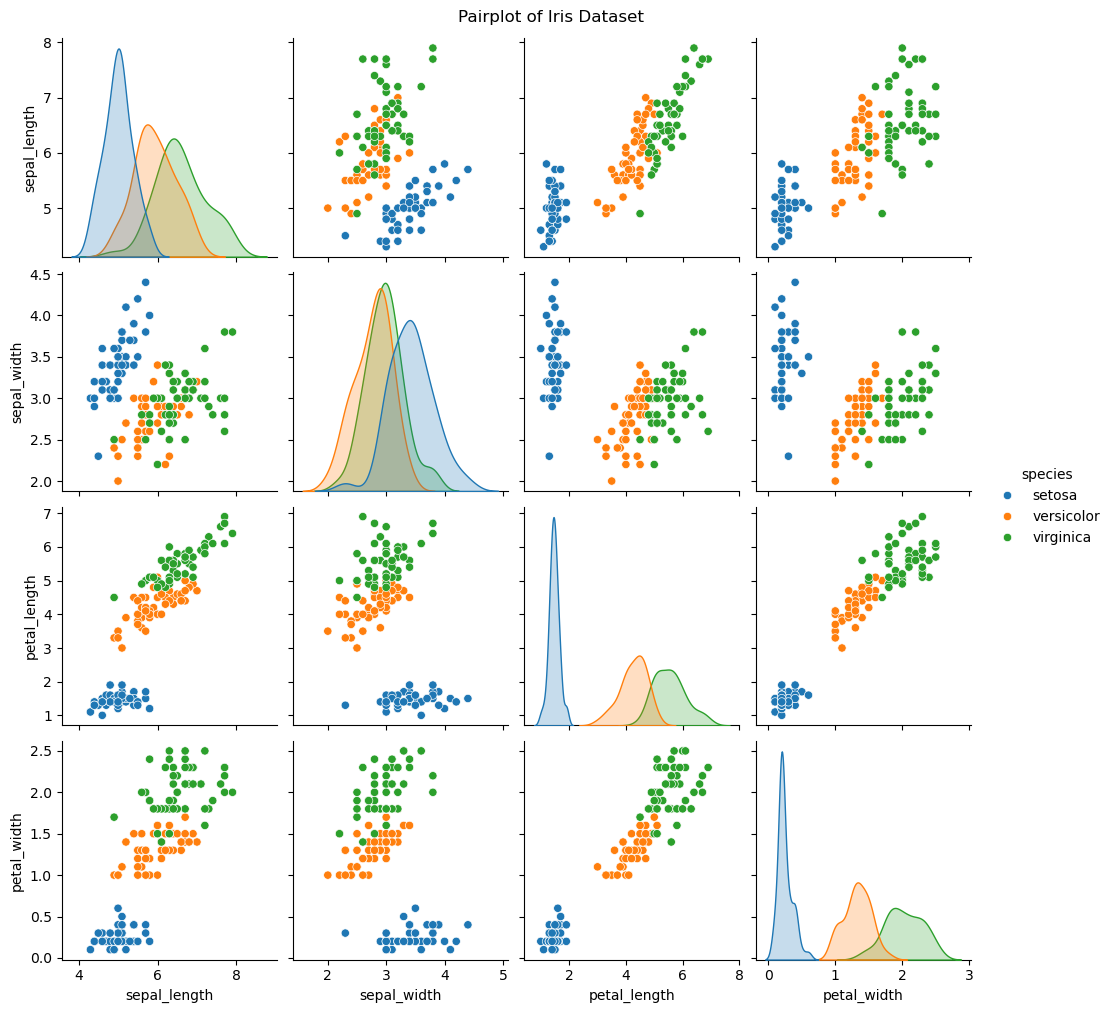

Shape of X (features: sepal_length, sepal_width): (150, 2)
Shape of y (targets: Setosa vs Rest): (150,)


In [3]:
# Load dataset
iris = sns.load_dataset("iris")

# Visualize data
sns.pairplot(iris, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.01)
plt.show()

# Select 2 features (continuous) as the input:
feature1 = 'sepal_length'
feature2 = 'sepal_width'
X = iris[[feature1, feature2]].values # Extract features values from the iris DF

# Combine the two classes that aren't 'setosa' into one class and keep labels (0 for setosa, 1 for others)
y = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 1}) # More readable, simple

# Can also use : np.choose (require int-encoding of labels used as index to select given class number : np.choose(array of labels (int encoded), choices(class number))
# Or ternary operator: good for binary target/classes : y = np.where(iris['species'] == 'setosa', 0, 1)

# Check shape of data
print("Shape of X (features: sepal_length, sepal_width):", X.shape)
print("Shape of y (targets: Setosa vs Rest):", y.shape)

In [4]:
# Train the classifier
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

#### 2.2. **(1 pt) Visualize the Decision Boundaries and update the plot's labels.**

- Use `seaborn` and `matplotlib` to plot the decision boundary for the logistic regression model.



In [5]:
def plot_decision_boundary(model, X, x1, x2):
    # Extract coefficients and intercept
    w1, w2 = model.coef_[0]
    b = model.intercept_[0]

    # Define the decision boundary equation: x2 = (-w1 / w2) * x1 - (b / w2)
    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    y_vals = (-w1 / w2) * x_vals - (b / w2)

    # Assuming X and y are your features and target
    plt.figure(figsize=(8, 6))

    # Scatter plot for the data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='RdYlBu', edgecolor='k', s=50)

    # Plot the decision boundary (replace x_vals and y_vals with your actual decision boundary data)
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")  # Dashed black line

    # Labels and title
    plt.xlabel(x1) # Feature 1
    plt.ylabel(x2) # Feature 2
    plt.title("Logistic Regression Decision Boundary")

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

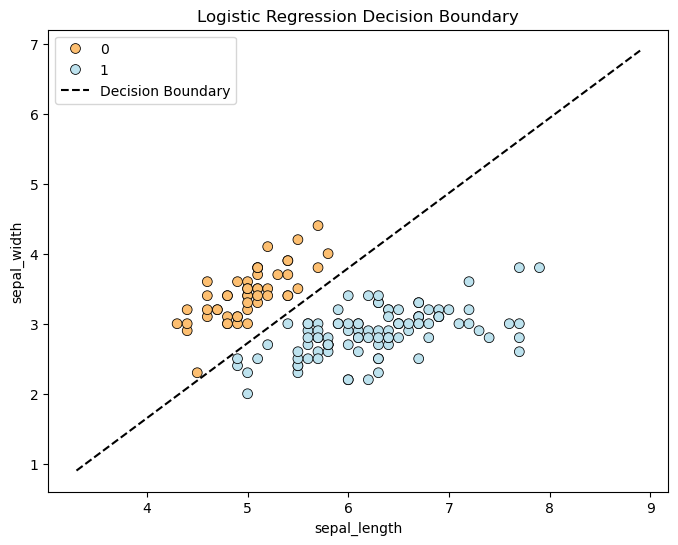

In [6]:
# Call the plotting function
plot_decision_boundary(model, X, feature1, feature2)
# 0 = setosa, 1 = non setosa

#### 2.3. **(2 pts) Print and interpret the model's coefficients. Briefly discuss whether logistic regression is a good choice for this dataset.**

**How to interpret the coefficients:**

Step 1: Sign of the Coefficient
- Positive coefficient ($β > 0$) → The feature increases the probability of the positive class.
- Negative coefficient ($β < 0$) → The feature decreases the probability of the positive class.

Step 2: Magnitude of the Coefficient
- A larger absolute value of $β_i$ means a stronger impact on the classification decision.
- A coefficient close to zero means the feature has little effect.

**How to interpret the intercept:**

The intercept shifts the decision boundary in feature space.
- A highly negative intercept ($β ≪ 0$) means that, by default, the model predicts the negative class ('setosa') unless one of the features significantly shifts the probability.
- A highly positive intercept ($β ≫ 0$) means that, by default, the model predicts the positive class ('not setosa').

Obtain the coefficients and intercept with the following code:
```
coefs = model.coef_[0]
intercept = model.intercept_[0]
```

In [7]:
# Print coefficients and intercept of the model
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print(f"Model Coefficients:", coefficients)
print(f"Model Intercept:", intercept)

# Calculate and print Mean and SD of coefficients
mean_coef = np.mean(coefficients)
std_coef = np.std(coefficients)
print("\n--- Coefficient Statistics ---")
print(f"Mean Coefficient Value: {mean_coef:.4f}") # Average value of the coefficient for sepal length and width don't help much here since it's the difference of the two coeffs 3.38 + - 3.16 /2 = 0.11
print(f"SD of Coefficients: {std_coef:.4f}") # It means we have some spread around the mean here only reflect the difference to the mean of the two features coeffs: 3.38-0.11 = 3.27 and 0.11 --3.16 = 3.27. not usefull here

Model Coefficients: [ 3.38828053 -3.1645602 ]
Model Intercept: -8.323154867279934

--- Coefficient Statistics ---
Mean Coefficient Value: 0.1119
SD of Coefficients: 3.2764


The logistic regression is a good choice in this specific approach since we are doing a classification of two (binary) classes Setosa vs not Setosa(the rest) and there is a good linear separability between the two class. It's simple and efficient here and easily interpretable.<BR>

- the linear assumptions of the regression seems to hold (for the features we chose)/ linear separability:  $log-odds(p) = β₀ + β₁*x₁ + β₂*x₂$
  - we can easily interpret the coeffs
  - logistic regression is efficient
  - we obtained a clean hyperplane(line)/boundary to classify setosa from non setosa

However, the logistic regression is not necessarily the best choice if we take the multiclass approach of the dataset: we would need softmax logistic regression and there is still the problem of linear separability since there is a close proximity or even overlapping of datapoints from two classes of the three classes.

Coefficient:<br>
For 'sepal_length':  3.3883 (Positive, large)
- indicates that as the sepal length of an Iris flower increases, the model estimates a higher probability of it being classified as "not setosa" (compared to "setosa")
   - In short: longer sepal lengths tend to make an Iris flower more likely to be "not setosa".

For 'sepal_width': -3.1646 (Negative, large)
- indicates that as the sepal width of an Iris flower increases, the model estimates a lower probability of it being classified as "not setosa".
   - In short : wider sepal widths tend to make an Iris flower more likely to be "setosa".

Intercept:  -8.3232 (Negative and Large)
- Class 0 = setosa and Class 1 = non setosa
- The intercept -> log-odds -> $log[P(not\ setosa)/1-P(not\ setosa)] = log[P(not\ setosa)/P(setosa)]$ suggests that when both sepal length and sepal width are zero (unrealistic):
  - the model predicts a very low probability of the flower being "non-setosa" : -8.3232 -> the odds are 0.000243 -> being setosa is almost sure =1 in probability.
    - meaning if we don't use any of our two feature we mostly will classify flower as setosa class 0 here.
  - our model strongly favors setosa classification unless we add features values or more features in our training for discrimination:
    - it makes some sense since setosa is very distinct from the others -> easily classified as setosa.

<font color='blue'> Think about whether it makes sense to take the mean of the coefs... What are the coefs and how do they relate to the decision boundary?

---
## DEMO: Model Selection and Evaluation
This assignment is designed to help you understand the principles of **train-test splits, cross-validation, KFold methodology, and model evaluation**. You will implement and analyze different machine learning models on the **Iris dataset**.


### Step 1: Load Dataset and Perform Train-Test Split

First, we load the dataset using `seaborn` and extract the features (`X`) and labels (`y`). Since machine learning models work with numerical data, we convert the categorical species labels into numeric codes.

Then, we split the dataset into:
- **Training set (80%)** – Used for model learning.
- **Test set (20%)** – Used for final model performance assessment.

In [8]:
# Load dataset
df = sns.load_dataset("iris")
X = df.drop(columns=["species"]).values
y = df["species"].astype("category").cat.codes.values

# Split data: 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (120, 4), Test set: (30, 4)


🧠 Have you checked the data type of the imported data from Seaborn? Are you familiar with this library? If not, check it out.

### Step 2: Implement Custom KFold Cross-Validation

Cross-validation ensures that the model generalizes well by dividing the dataset into `k` folds. Each fold takes turns being the validation set while the rest serve as training data. This helps reduce overfitting.

- We use **KFold(n_splits=5)** to create five different train-validation splits.
- For each split, the model is trained on training data and evaluated on validation data.
- We store **accuracy scores** and **confusion matrices** for later analysis.


In [9]:
def custom_cross_validation(model, X, y, k=5):
    """Perform KFold cross-validation and return accuracy scores & averaged confusion matrix."""
    kf = KFold(n_splits=k, shuffle=True, random_state=42) # This is where the folds are created
    conf_matrices = []
    scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        # Uncomment the following line to see the distribution of the folds
        #print(f"Fold {fold + 1}: Train size: {len(train_idx)}, Validation size: {len(val_idx)}")

        model.fit(X_train_fold, y_train_fold)  # Train model
        y_pred = model.predict(X_val_fold)  # Predict on validation fold

        score = accuracy_score(y_val_fold, y_pred)
        scores.append(score)  # Store accuracy
        conf_matrices.append(confusion_matrix(y_val_fold, y_pred))  # Store confusion matrix

    avg_conf_matrix = np.mean(conf_matrices, axis=0)  # Average confusion matrix
    return scores, avg_conf_matrix


### Step 3: Train & Evaluate Different Models Using KFold

Now, we apply a Decision Tree classifier model on the Iris dataset using KFold cross-validation.

- Each model's mean accuracy and standard deviation (measure of variance) is printed.
- The average confusion matrix is visualized.

Decision Tree - Mean Accuracy: 95.33%
Decision Tree - Mean SD: 0.04


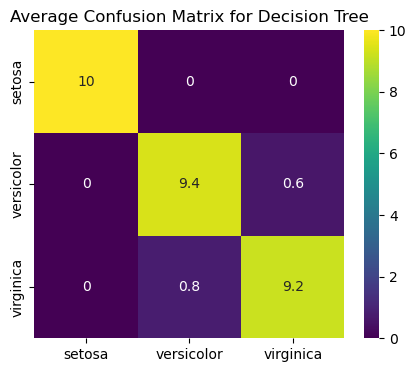

In [10]:
# Classify with a Decision Tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Apply cross-validation
scores, avg_conf_matrix = custom_cross_validation(model, X, y)

# Print final model evaluation
print(f"Decision Tree - Mean Accuracy: {round(np.mean(scores)*100, 2)}%")
print(f"Decision Tree - Mean SD: {round(np.std(scores, ddof=1), 2)}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(pd.DataFrame(avg_conf_matrix,
                        columns=df['species'].unique(),
                        index=df['species'].unique()),
            annot=True, cmap='viridis')
plt.title(f"Average Confusion Matrix for Decision Tree")
plt.show()


If the cross-validation results look stable (low variance across folds), and the model isn’t overfitting, we can move on to the test set.

### Step 4: Evaluate Best Model on Test Set

- The best model (based on cross-validation accuracy) is **selected and trained** on the entire training dataset.
- It is tested on the **test set**, and a final confusion matrix is plotted.


Final Decision Tree Model Evaluation on Test Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



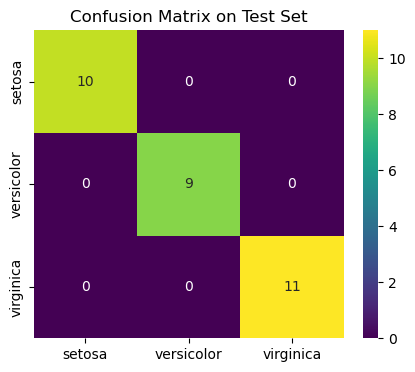

In [11]:
# Fit classification model and predict test data
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# Print classification report on test set
print("\nFinal Decision Tree Model Evaluation on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=df["species"].unique()))

# Plot final confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='viridis',
            xticklabels=df["species"].unique(), yticklabels=df["species"].unique())
plt.title("Confusion Matrix on Test Set")
plt.show()


---
That was a lot of code... Make sure you understand all the steps before continuing 😀

Now, apply what you've learned by answering these exercises:

# 3. Harder Exercises (Total: 14 points)

#### 3.1. **(2 pts) Decrease the `max_depth` of the decision tree to 1 and comment on the effect it has on classification performance.**

💡 Hint: Visualize the data using a confusion matrix and pairplot and see if you can figure out what's happening.


Decision Tree (max_depth=1) - Mean Accuracy: 63.33%
Decision Tree (max_depth=1) - Mean SD: 0.03


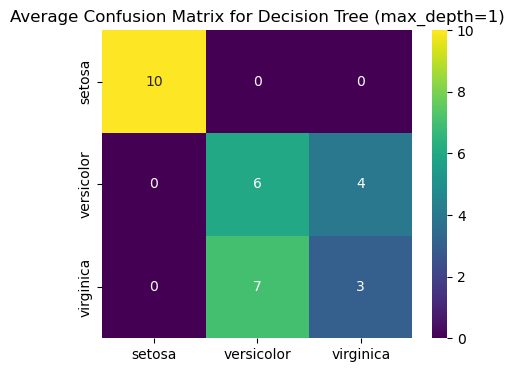

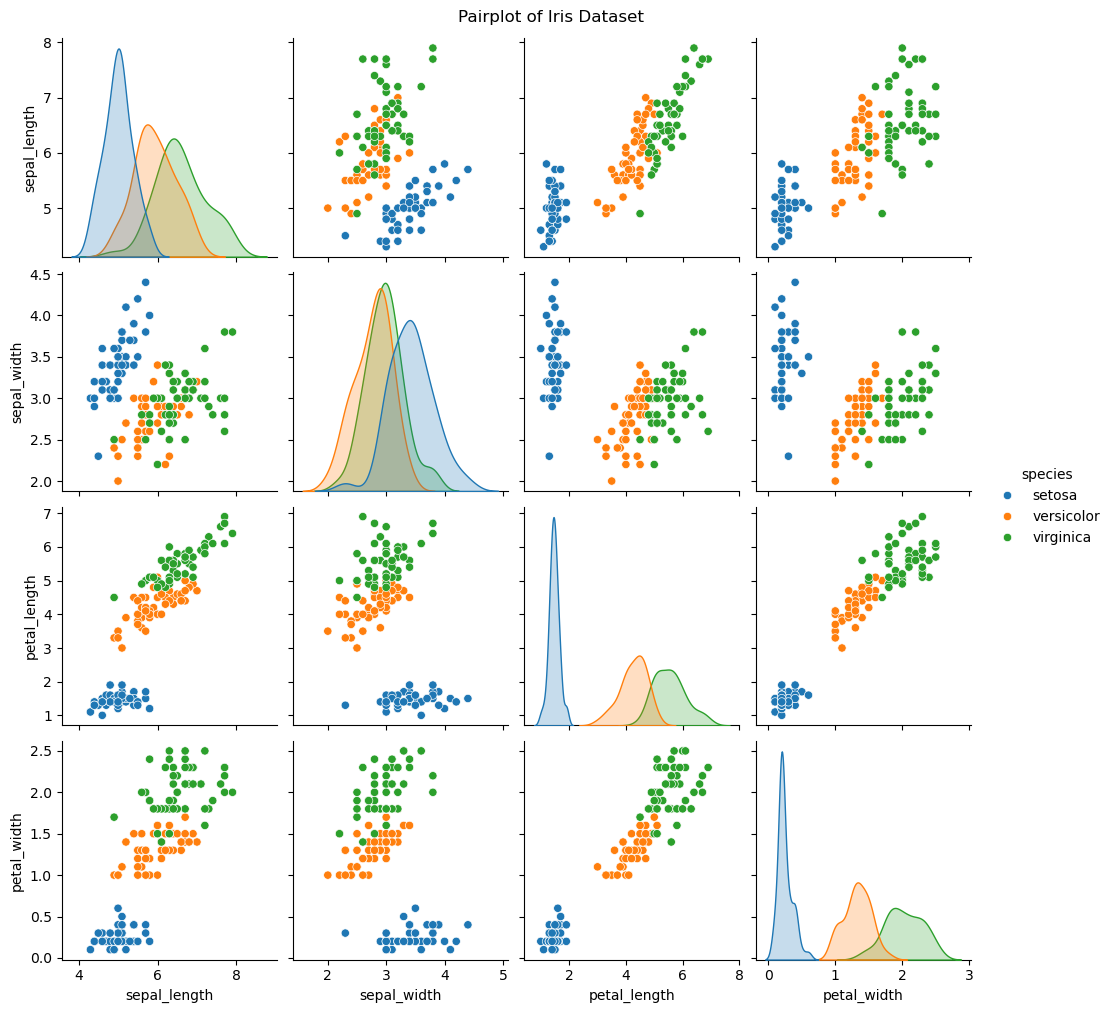

In [12]:
# Classify with a Decision Tree (max_depth=1)
model_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)

# Apply cross-validation
scores_depth_1, avg_conf_matrix_depth_1 = custom_cross_validation(model_depth_1, X, y)

# Print final model evaluation
print(f"Decision Tree (max_depth=1) - Mean Accuracy: {round(np.mean(scores_depth_1)*100, 2)}%")
print(f"Decision Tree (max_depth=1) - Mean SD: {round(np.std(scores_depth_1, ddof=1), 2)}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(pd.DataFrame(avg_conf_matrix_depth_1,
                         columns=df['species'].unique(),
                         index=df['species'].unique()),
            annot=True, cmap='viridis')
plt.title(f"Average Confusion Matrix for Decision Tree (max_depth=1)")
plt.show()

# Plot pairplot
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.01)
plt.show()


Classification between Setosa and non-Setosa(other classes) is good: there is a good linear separability.
<br>
But the classification between Versicolor and Virginica is bad: there is a lot of FPs/missclassifications : this makes the global accuracy drops quite much.
- This is due to close the proximity, even overlapping of datapoints (depending on the pairs of features used) for the two last classes Veriscolor and Virignica.
- By reducing the depth of the model for the training, we reduce also the complexity of the model, which may lead to underfitting.
    - With a depth of 1, here, the model lacks the capacity to capture the more complex separation decision boundaries required to properly separate the three classes.


#### 3.2. **(6 pts) Follow the DEMO analysis using the `penguins` dataset from `seaborn` with the following modifications:**
- Train-test split with 70% training, 30% test
- Decision tree classifier with `max_depth=3`
- Use the [`cross-validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) package with 5 folds from `sklearn` instead of the custom one.
- Print the cross-validation scores and their mean accuracy as a percentage.
- Fit the decision tree model and predict the classes of the test data.
- Plot a confusion matrix with a different color map (not `viridis` or `rocket`).

💡 Hint: examine the data first, the input `X` should be a list of continuous variables and there should be no missing values (if you find any, remove the whole row)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
Dataframe Info: None

Missing values / column: species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Training set shape: (233, 4), Test set shape: (100, 4)

Cross-Validation scores (accuracies) by folds:  97.87% |  93.62% |  93.62% |  93.48% |  93.48%
Aggregated Mean/SD Cross-Validat

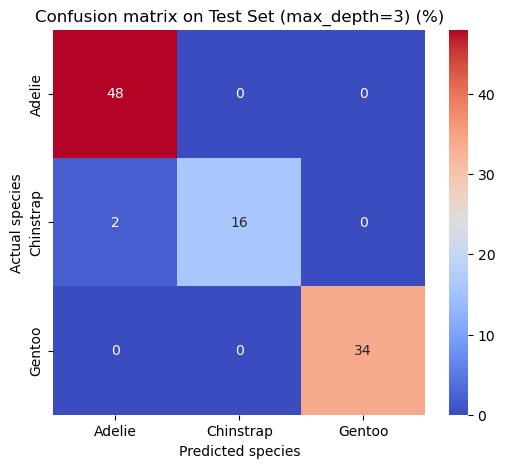


Classification Report on Test Set (Decision Tree, max_depth=3):
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.89      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100



In [13]:
# Load dataset :
df_pingu = sns.load_dataset("penguins")  # Pingu dataset :D

# Check data for missing values and data types
print("Dataframe Info:", df_pingu.info())
print("\nMissing values / column:", df_pingu.isnull().sum()) # Missing values
df_pingu_clean = df_pingu.dropna() # Drop rows with any missing values : 11 row dropped

# Select continuous features for X and are not the target variable 'species' (labels)
X_pingu = df_pingu_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# Encode target variable 'species'
encoder = LabelEncoder() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
y_pingu = encoder.fit_transform(df_pingu_clean["species"]) # https://scikit-learn.org/stable/modules/preprocessing_targets.html  6.9.2. Label encoding
# And def labels from encoder classes
labels_name = encoder.classes_

# Train-test split with 70% training, 30% test
X_train_pingu, X_test_pingu, y_train_pingu, y_test_pingu = train_test_split(X_pingu, y_pingu, train_size=0.7, random_state=42)
print(f"Training set shape: {X_train_pingu.shape}, Test set shape: {X_test_pingu.shape}") # On the 344 rows: 11 dropped , on the 333 left -> 233 for train 100 for test.

# Initialize a Decision tree classifier with max_depth=3
model_pinguin = DecisionTreeClassifier(max_depth=3, random_state=42)

# Use cross-validate with 5 folds from sklearn
cv = KFold(n_splits=5, shuffle=True, random_state=42) # Define KFold cross-validator
cv_results = cross_validate(model_pinguin,X_train_pingu,y_train_pingu, cv=cv, scoring='accuracy', return_estimator=True) # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

# Print cross-validation scores and accuracy mean and std (%)
cv_scores_pingu = cv_results['test_score']
mean_accuracy_pingu = np.mean(cv_scores_pingu) * 100
std_accuracy_pingu = np.std(cv_scores_pingu) * 100
# Accuracy for each folds
print("\nCross-Validation scores (accuracies) by folds:", " | ".join(f" {score*100:.2f}%" for score in (cv_scores_pingu)))# join to make a string with separator-> one line print
# Accuracy for the whole CV set
print(f"Aggregated Mean/SD Cross-Validation (5 folds) accuracy: {mean_accuracy_pingu:.2f}% (±{std_accuracy_pingu:.2f}%)")

# Fit the decision tree model on the training set
model_pinguin.fit(X_train_pingu, y_train_pingu)

# Predict the classes of the test data
y_test_pred_pingu = model_pinguin.predict(X_test_pingu)

# Plot a confusion matrix
cm_pingu = confusion_matrix(y_test_pingu, y_test_pred_pingu)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_pingu, annot=True, cmap='coolwarm',
            xticklabels=labels_name,
            yticklabels=labels_name)
plt.title("Confusion matrix on Test Set (max_depth=3) (%)") # We get a kind of normalised confusion matrix in %, because we test on 100 values -> see shape of test_train
plt.xlabel("Predicted species")
plt.ylabel("Actual species")
plt.show()

# Print classification report for the test set
print("\nClassification Report on Test Set (Decision Tree, max_depth=3):")
print(classification_report(y_test_pingu, y_test_pred_pingu, target_names=labels_name))

<font color='blue'> You don't need to use `KFold` if you use `cross_validate`

#### 3.3. **(6 pts) Train and evaluate Decision Tree, KNN, Naive Bayes, Random Forest, and SVM classifiers on the `penguins` dataset.**

- Split into training (70%) and test (30%) sets
- Train and evaluate each classifier using 10-fold cross-validation.
- After evaluating all models, compare their performance using accuracy, precision, recall, and F1-score based on the cross-validation results.
- Select the 3 best-performing models based on the cross-validation metrics.
- Finally, fit the selected models to the entire training dataset and evaluate them on the test set using the same performance metrics.

In [14]:
# Load the pingu dataset from seaborn and remove rows with missing values
df_pingu_cleaned = sns.load_dataset("penguins").dropna() # Shorter version

# Select features (numerical columns) and target (species "of penguins")
X_pingu = df_pingu_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# Encode target variable 'species' and def labels_names
encoder = LabelEncoder() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
y_pingu = encoder.fit_transform(df_pingu_cleaned["species"]) # https://scikit-learn.org/stable/modules/preprocessing_targets.html  6.9.2. Label encoding
labels_name= encoder.classes_

# Split data into 70% training and 30% testing sets
X_train_pingu, X_test_pingu, y_train_pingu, y_test_pingu = train_test_split(X_pingu, y_pingu, train_size=0.7, random_state=42, stratify=y_pingu) #New: stratify better when classes imbalance -> try to keep proportion of classes in the folds.

# Define K-Fold cross-validation strategy with 10 splits
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the different classification models for benchmarking
classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(max_depth=3, random_state=42),
    "SVM": SVC(random_state=42)
}

# Define "custom" scoring metrics to be used for model evaluation: handling no prediction (div by 0 => 0) and averaging over all classes "macro". (because of multiclass here)
# Used "macro" ": calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account."
# "None", the metrics for each class are returned.
# "weighted" to control for class imbalance ? ->  Almost the same results, see reports : 1% differences.
# https://scikit-learn.org/stable/api/sklearn.metrics.html  // # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-adapt-metric // 3.4.3.3. Using multiple metric evaluation

scoring_metrics = {
    'accuracy': 'accuracy', # Use default accuracy scoring (already on all classes // no division by 0)
    'precision': make_scorer(precision_score, average='macro', zero_division=0.0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0.0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0.0)
}

# Functions for evaluation :
def evaluate_model_cv(model, X_train, y_train, cv, scorers): 
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scorers) # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    return {metric: {'mean': round(np.mean(scores[f'test_{metric}']), 3), 'std': round(np.std(scores[f'test_{metric}'], ddof=1), 3)} for metric in scorers}  # return the mean and sd for the specified metrics

def evaluate_model_test(model, X_train, y_train, X_test, y_test,labels):
    model.fit(X_train, y_train) #training
    return classification_report(y_test, model.predict(X_test), target_names=labels, zero_division=0.0) # Return classification report https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Initialize dictionaries to store results
cv_results = {} #store cross-validation results in a dict
#test_classification_reports = {}  #if we want to store test set reports

# Evaluate each classifier using cross-validation
print("Cross-validation Mean Accuracy and SD :")
for model_name, model in classifiers.items():
    cv_results[model_name] = evaluate_model_cv(model, X_train_pingu, y_train_pingu, cv, scoring_metrics) # Store the metrics of CV for each model in a dict.
    print(model_name,":")
    for metric in scoring_metrics:
        print(f"  {metric.capitalize()}: {cv_results[model_name][metric]['mean'] * 100:.2f}% (±{cv_results[model_name][metric]['std'] * 100:.2f})") # Print the metric mean and sd for each model

    # In one line version for each model:
    #metrics_list=[f" {metric.capitalize()}: {cv_results[model_name][metric]['mean'] * 100:.2f}% (±{cv_results[model_name][metric]['std'] * 100:.2f})".ljust(30) for metric in [scoring_metrics]]
    #print(" ".join(metrics_list))

# Select the top 3 models: (used the f1 score metric since there is some class imbalance 44,36,20 %) and print them with mean and sd.
top_3_models = sorted(cv_results.items(), key=lambda x: x[1]['f1']['mean'], reverse=True)[:3] # Order the dictionary in reverse (highest first// descending order) select the 3 first: select key x[1] = model_name, scorer/metric: f1,  estimate : mean
print("\nEvaluation with F1-score from CV : top 3 performing models")
for model_name, metrics in top_3_models:
    print(f"{model_name:<15} {metrics['f1']['mean']*100:.2f}% (±{metrics['f1']['std']*100:.2f})" ) # Formating to left align

# Final Test : evaluate the top 3 models on the test set and print the classification reports
print("\nTest set performance for the top 3 models:")
for model_name, metrics in top_3_models: # List of tuples (model_name, metrics: mean , sd)
    report = evaluate_model_test(classifiers[model_name], X_train_pingu, y_train_pingu, X_test_pingu, y_test_pingu, labels_name)
    print(f"{model_name} - Classification report on test set:\n{report}")
    # test_classification_reports[model_name]=report # if we want to store all the classification reports dict for the 3 models


Cross-validation Mean Accuracy and SD :
Decision Tree :
  Accuracy: 93.60% (±4.20)
  Precision: 94.30% (±4.20)
  Recall: 91.00% (±6.50)
  F1: 91.60% (±5.80)
KNN :
  Accuracy: 76.90% (±10.20)
  Precision: 75.00% (±16.30)
  Recall: 69.90% (±9.90)
  F1: 68.80% (±12.10)
Naive Bayes :
  Accuracy: 96.60% (±3.40)
  Precision: 96.10% (±4.00)
  Recall: 95.80% (±4.10)
  F1: 95.70% (±3.90)
Random Forest :
  Accuracy: 96.20% (±4.30)
  Precision: 95.60% (±4.60)
  Recall: 95.60% (±5.10)
  F1: 95.30% (±4.80)
SVM :
  Accuracy: 72.20% (±7.70)
  Precision: 50.30% (±5.40)
  Recall: 60.70% (±5.70)
  F1: 54.10% (±5.60)

Evaluation with F1-score from CV : top 3 performing models
Naive Bayes     95.70% (±3.90)
Random Forest   95.30% (±4.80)
Decision Tree   91.60% (±5.80)

Test set performance for the top 3 models:
Naive Bayes - Classification report on test set:
              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        44
   Chinstrap       0.95      0.95      

#### 3.4. **(1 pt) According to the evaluation metrics, which model classifies the penguins dataset best?**

Naive Bayes is the top classifier: highest F1 score overall metrics and also the highest accuracy.
- avg f1: 0.98, avg acc 0.98: => avg 2 FP (missclassifications)

But the other models are close: Random Forest is almost equivalent with few % less in both metrics.
- avg f1: 0.95, avg acc: 0.96 => avg 4-5 FP (missclassifications)

We can also see that the "simpler classifier" Decision Tree is also relatively good.
- avg f1: 0.93, avg acc: 0.94 => avg 6-7 FP (missclassifications)


In [15]:
points

30